# 2017 Ford GoBike Analysis
## by Jamie Farley

Would you like a fun, environmentally-friendly, and active way to get around the city of San Francisco? Well look no further! If you are a local or a visitor to the city, Ford offers a bike sharing system called GoBike that features rental bikes at 262 different stations located all throughout the city. Bike sharing systems are becoming more and more popular and we set out to see what the data tells us!

## Investigation Overview

The goal of this investigation is to determine the differences of customers and subscribers using the GoBike system from June 2017 to December 2017. It involves ride duration, rider age, rider gender and seeing which days and hours are the most popular for GoBike rentals.

## Dataset Overview

This dataset will feature user types (customer or subscriber), ride duration, and rider age. It will also include the days of the week and the hours of the day of bike start times.

In [86]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [87]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('clean_master_file.csv')

## Weekly Usage of the GoBike Share System by User Type

These graphs show the difference between customers and subscribers by day of the week. It's clear that customers use the GoBike system more heavily on the weekends, specifically Friday through Sunday. In contrast, subscribers use the bike system during the weekdays significantly more than on the weekend, specifically just Saturday and Sunday. It's also important to note that customers have almost 1000 rides more on Saturdays than any day of the week for subscribers

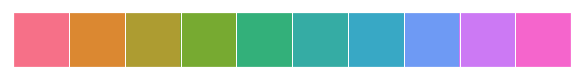

In [88]:
sb.set()
sb.palplot(sb.husl_palette(10))
sb.set_palette("husl")

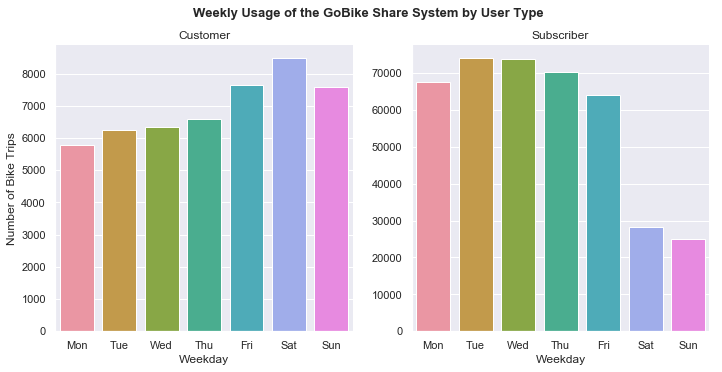

In [89]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count', sharey = False, order = weekday)
g.set_axis_labels("Weekday", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly Usage of the GoBike Share System by User Type', y=1.03, fontsize=13, fontweight='bold');

## Hourly Usage of the GoBike Share System by User Type

These graphs show the difference between customers and subscribers by hour of the day. With customers, you can see that the most popular riding hours are between 8:00am and 6:00pm. In contrast, the most popular hours for subscribers are at 8:00am and 5:00pm, with the hours in between being significantly less popular.

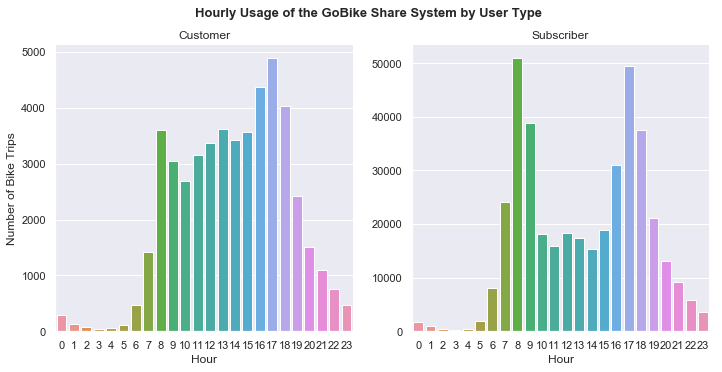

In [90]:
g = sb.catplot(data=df_clean, x='start_time_hour', col="user_type", kind='count', sharey = False)
g.set_axis_labels("Hour", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly Usage of the GoBike Share System by User Type', y=1.03, fontsize=13, fontweight='bold');

## Weekly Usage of the GoBike Share System by User Type and Age


These graphs show us that the most popular age group for customers is 18-29 and they ride the most, every day besides Tuesday and Wednesday. The most popular age group for subscribers is 30-44 and they ride the most every day of the week. The age group that rides the least is 60+ for both customers and subscribers.

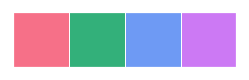

In [91]:
flatui = ["#f67088", "#33b07a", "#6e9af4", "#cc79f4"]
sb.set_palette(flatui)
sb.palplot(sb.color_palette())

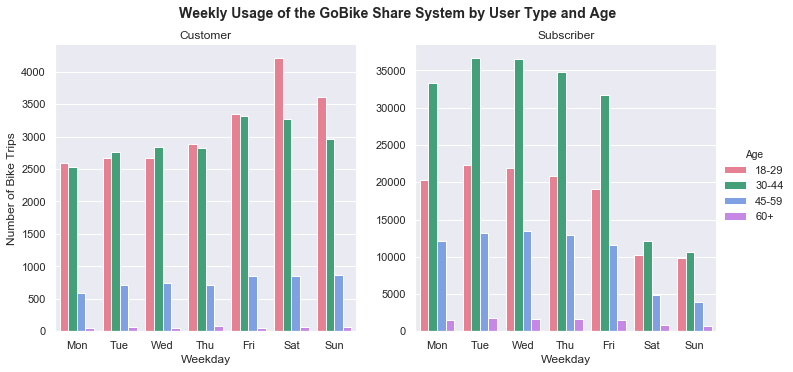

In [92]:
# Create bins for age ranges
bins = [18, 30, 45, 60, np.inf]
names = ['18-29', '30-44', '45-59', '60+']
df_clean['AgeRange'] = pd.cut(df_clean['member_age'], bins, labels=names)

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df_clean, x='start_time_weekday', col="user_type", hue='AgeRange', kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Weekday", "Number of Bike Trips")
g._legend.set_title('Age')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly Usage of the GoBike Share System by User Type and Age', y=1.03, fontsize=14, fontweight='semibold');

## Trip Duration by User Type and Age


Here you can see the difference between each user type and age group with the limit at 3,000 seconds. The customers seem to take longer trips overall with the 60+ category taking the longest. With subscribers, the trips all seem to be fairly the same duration, which further confirms the theory that most subscribers use the bike system to get to work whereas customers are using it for sightseeing and leisure.

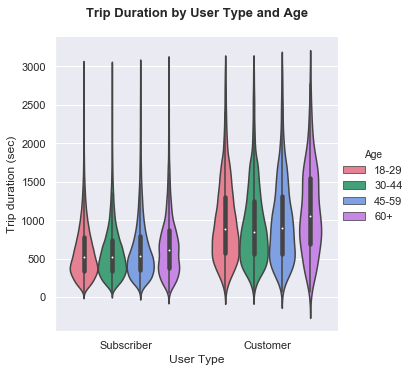

In [93]:
duration = df_clean.query('duration_sec < 3000')
g = sb.catplot(data=duration, x='user_type', y="duration_sec", hue="AgeRange", kind="violin")

g.set_axis_labels("User Type", "Trip duration (sec)")
g._legend.set_title('Age')
g.fig.suptitle('Trip Duration by User Type and Age', y=1.03, fontsize=13, fontweight='bold');

## Summary

Using the Ford GoBike rental system to cruise around the beautiful city of San Francisco is a great idea and we see here that both locals and visitors take advantage of it. Most of the people using the bikes are subscribers and seem to use the bikes the most at the beginning and end of the work day. Whereas one-time customers seem to ride the bikes the most on the weekends all throughout the day. The most popular age group for riders is 30 to 44 years old! That is amazing and it means that people are staying active. Ford GoBike is a healthy and environmentally friendly way to ride around San Francisco so hop on one today!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'slide_deck.ipynb'])

0